Loading intrinsic population
Loading GW population
Loading EM population (kilonova)

EoS: SFHo
Population model: A
The mass and spin distributions are NOT fixed
The spin prescription is: Zero 

Computing KN limiting thresholds
Saturation rates KN: 347.10259337134426
Saturation rates KN: 347.10279629198476
Saturation rates KN: 347.10279629198476
Computing KN limiting thresholds
Computing KN limiting thresholds
Computing KN limiting thresholds


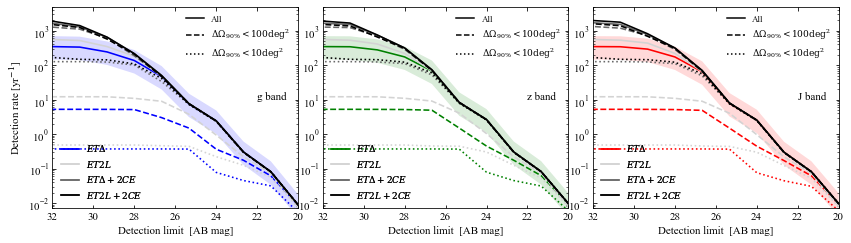

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from astropy.cosmology import Planck18 as cosmo
import os
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from functions_ET import * 
sys.path.insert(0, '../COMPAS')
from spin_class import * 
import warnings
warnings.filterwarnings("ignore")

num = 1000000
eos = "SFHo"
mns_max = 2.058838

table = h5py.File('../horizons2/population/computed_population/bhns_%i_%s_z10_mass_spin_thv_GWFAST_ET.hdf5' %(num,eos),'r')

DCOtype='BHNS'
poptype='A'
path = '../horizons2/importance_sampling/mass_rate/ET_COMPASCompactOutput_'+ DCOtype + '_' + poptype+'.h5'

distribution = 'NOT fixed'
spin_prescription = 'Zero'

if poptype == 'A':
    w_type='w_000'
    r0 = 94
    w_type_high = 'w_000'
    r0_high = 203
    w_type_low = 'w_000'
    r0_low = 30

# --- Loading Population --- #
print("Loading intrinsic population")
mbh = table['mbh'][()]
mns = table['mns'][()]
lamb_ns = table['lamb_ns'][()]
spin_bh = table['spin_bh'][()]
z = table['z'][()]
dL = table['dL'][()]
thv = table['thv'][()]
ra = table['ra'][()]
dec = table['dec'][()]
m_dyn = table['m_dyn'][()]
v_dyn = table['v_dyn'][()]
m_disk = table['m_disk'][()]
m_out = table['m_out'][()]
final_x = table['final_x'][()]
E_bkt = table['E_bkt'][()]
E_k_jet = table['E_k_jet'][()]
Ec = table['Ec'][()]

print("Loading GW population")
snr_ETT2CE = table['snr_ETT2CE'][()]
snr_ETT = table['snr_ETT'][()]
sky_loc_ETT2CE = table['sky_loc_ETT2CE'][()]
sky_loc_ETT = table['sky_loc_ETT'][()]
snr_ETL2CE = table['snr_ETL2CE'][()]
snr_ETL = table['snr_ETL'][()]
sky_loc_ETL2CE = table['sky_loc_ETL2CE'][()]
sky_loc_ETL = table['sky_loc_ETL'][()]

print("Loading EM population (kilonova)")
kn_waves = table['kn_waves'][()]
t_kn = table['t_kn'][()]
lc_kn = table['lc_kn'][()]
table.close()

# --- Weights --- #
np.random.seed(0)
spin = calculate_spin_olderCOMPASdata(data_path=path)
if spin_prescription == 'Bavera21':
    spinM1, spinM2  = spin.Bavera21()
elif spin_prescription == 'Qin21':
    spinM1, spinM2  = spin.Qin21()
elif spin_prescription == 'Uniform':
    spinM1, spinM2  = spin.Bavera21()
    spinM1 = np.random.uniform(0.,0.5,spinM1.shape)
    spinM2 = np.random.uniform(0.,0.5,spinM2.shape)
elif spin_prescription == 'Zero':
    spinM1, spinM2  = spin.Bavera21()
    spinM1 = np.zeros_like(spinM1)
    spinM2 = np.zeros_like(spinM2)

bhx = [2.5, 27]
nsx = [1.1, 3]
spinx = [0., 1.]
binsx = 50
binsy = 50
binsz = 50

if distribution == 'NOT fixed':
    table_w = h5py.File('../horizons2/population/computed_population/weight/w_bhns_%s_%s_notfixed.hdf5' %(eos,spin_prescription),'r')
    C_mc = table_w['C_mc'][()]
    C_mc_low = table_w['C_mc_low'][()]
    C_mc_high = table_w['C_mc_high'][()]
    w = table_w['w'][()]
    w_low = table_w['w_low'][()]
    w_high = table_w['w_high'][()]
    table_w.close()

print("\nEoS:", eos)
print("Population model:", poptype)
print("The mass and spin distributions are", distribution)
print("The spin prescription is:", spin_prescription, "\n")

# --- Limiting Thresholds --- #
lim_snr = 12.
lim_kn = np.linspace(20., 32., 10)
det_kn_g = np.zeros(len(lim_kn))
det_kn_g_low = np.zeros(len(lim_kn))
det_kn_g_high = np.zeros(len(lim_kn))
det_kn_g_100 = np.zeros(len(lim_kn))
det_kn_g_40 = np.zeros(len(lim_kn))
det_kn_g_10 = np.zeros(len(lim_kn))
det_kn_z = np.zeros(len(lim_kn))
det_kn_z_low = np.zeros(len(lim_kn))
det_kn_z_high = np.zeros(len(lim_kn))
det_kn_z_100 = np.zeros(len(lim_kn))
det_kn_z_10 = np.zeros(len(lim_kn))
det_kn_J = np.zeros(len(lim_kn))
det_kn_J_low = np.zeros(len(lim_kn))
det_kn_J_high = np.zeros(len(lim_kn))
det_kn_J_100 = np.zeros(len(lim_kn))
det_kn_J_10 = np.zeros(len(lim_kn))

x = np.sort(z)
s = np.argsort(z)

snr = [snr_ETT, snr_ETL, snr_ETT2CE, snr_ETL2CE]
sky = [sky_loc_ETT, sky_loc_ETL, sky_loc_ETT2CE, sky_loc_ETL2CE]
color_g = ['b', 'lightgrey', 'dimgrey', 'black']
color_z = ['green', 'lightgrey', 'dimgrey', 'black']
color_J = ['red', 'lightgrey', 'dimgrey', 'black']

plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['figure.figsize'] = 12., 3.5
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

gs = gridspec.GridSpec(1, 3, top=0.95, right=0.98, left=0.07, wspace=0.1, hspace=0.1, bottom=0.15) 

for k in range(0,len(snr)):
    gw_snr = snr[k]
    sky_loc = sky[k]
    gw_det = gw_snr >= lim_snr
    
    #gw_snr_lim = snr_lim[k]
    #sky_loc_lim = sky_lim[k]
    #gw_det_lim = gw_snr_lim >= lim_snr
    
    
    #KILONOVA
    print("Computing KN limiting thresholds")
    kn_peak = np.min(lc_kn, axis=2)
    kn_det = np.zeros([num,len(kn_waves)],dtype=bool)
    for i in range(len(lim_kn)):
        for j in range(len(kn_waves)):
            kn_peak_APP = abs_to_app(kn_peak[:,j],dL[:]*1.e6)
            kn_det[:,j] = kn_peak_APP <= lim_kn[i]
        kn_det_g = kn_det[:,0]
        kn_det_z = kn_det[:,1]
        kn_det_J = kn_det[:,2]
        cum_gw_kn_g = C_mc*np.cumsum(w[s]*kn_det_g[s]*gw_det[s]*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6))) 
        cum_gw_kn_g_low = C_mc_low*np.cumsum(w_low[s]*kn_det_g[s]*gw_det[s]*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6)))
        cum_gw_kn_g_high = C_mc_high*np.cumsum(w_high[s]*kn_det_g[s]*gw_det[s]*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6)))
        cum_gw_kn_g_100 = C_mc*np.cumsum(w[s]*kn_det_g[s]*gw_det[s]*(sky_loc[s]<100.)*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6))) 
        cum_gw_kn_g_40 = C_mc*np.cumsum(w[s]*kn_det_g[s]*gw_det[s]*(sky_loc[s]<40.)*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6))) 
        cum_gw_kn_g_10 = C_mc*np.cumsum(w[s]*kn_det_g[s]*gw_det[s]*(sky_loc[s]<10.)*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6))) 
        cum_gw_kn_z = C_mc*np.cumsum(w[s]*kn_det_z[s]*gw_det[s]*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6)))
        cum_gw_kn_z_low = C_mc_low*np.cumsum(w_low[s]*kn_det_z[s]*gw_det[s]*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6)))
        cum_gw_kn_z_high = C_mc_high*np.cumsum(w_high[s]*kn_det_z[s]*gw_det[s]*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6)))
        cum_gw_kn_z_100 = C_mc*np.cumsum(w[s]*kn_det_z[s]*gw_det[s]*(sky_loc[s]<100.)*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6))) 
        cum_gw_kn_z_10 = C_mc*np.cumsum(w[s]*kn_det_z[s]*gw_det[s]*(sky_loc[s]<10.)*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6))) 
        cum_gw_kn_J = C_mc*np.cumsum(w[s]*kn_det_J[s]*gw_det[s]*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6)))
        cum_gw_kn_J_low = C_mc_low*np.cumsum(w_low[s]*kn_det_J[s]*gw_det[s]*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6)))
        cum_gw_kn_J_high = C_mc_high*np.cumsum(w_high[s]*kn_det_J[s]*gw_det[s]*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6)))
        cum_gw_kn_J_100 = C_mc*np.cumsum(w[s]*kn_det_J[s]*gw_det[s]*(sky_loc[s]<100.)*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6))) 
        cum_gw_kn_J_10 = C_mc*np.cumsum(w[s]*kn_det_J[s]*gw_det[s]*(sky_loc[s]<10.)*((m_disk[s]>1.e-5)|(m_dyn[s]>1.e-6)))
        det_kn_g[i] = cum_gw_kn_g[-1]
        det_kn_g_low[i] = cum_gw_kn_g_low[-1]
        det_kn_g_high[i] = cum_gw_kn_g_high[-1]
        det_kn_g_100[i] = cum_gw_kn_g_100[-1]
        det_kn_g_10[i] = cum_gw_kn_g_10[-1]
        det_kn_g_40[i] = cum_gw_kn_g_40[-1]
        det_kn_z[i] = cum_gw_kn_z[-1]
        det_kn_z_low[i] = cum_gw_kn_z_low[-1]
        det_kn_z_high[i] = cum_gw_kn_z_high[-1]
        det_kn_z_100[i] = cum_gw_kn_z_100[-1]
        det_kn_z_10[i] = cum_gw_kn_z_10[-1]
        det_kn_J[i] = cum_gw_kn_J[-1]
        det_kn_J_low[i] = cum_gw_kn_J_low[-1]
        det_kn_J_high[i] = cum_gw_kn_J_high[-1]
        det_kn_J_100[i] = cum_gw_kn_J_100[-1]
        det_kn_J_10[i] = cum_gw_kn_J_10[-1]
    
    plt.subplot(gs[0])
    plt.plot(lim_kn,det_kn_g,color=color_g[k],ls="-",linewidth=1.6,label="All")
    plt.plot(lim_kn,det_kn_g_100,color=color_g[k],ls="--",linewidth=1.6,label=r"$\Delta\Omega_{{\rm 90}\%}<100\mathrm{deg}^2$")
    plt.plot(lim_kn,det_kn_g_10,color=color_g[k],ls=":",linewidth=1.6,label=r"$\Delta\Omega_{{\rm 90}\%}<40\mathrm{deg}^2$")
    
    if k == 0:
        plt.fill_between(lim_kn,det_kn_g_high,det_kn_g_low,color='blue',alpha=0.15,edgecolor="None")
     
    plt.tick_params(which='both',direction='in',left=True,bottom=True,top=True,right=True,labelsize=11)
    #plt.xscale("log")
    plt.yscale("log")
    plt.xlim((20,32))
    plt.ylim((7.e-3,5.e3))
    #plt.annotate('J band', xy=(0.05, 0.05), xycoords='axes fraction',size=12)
    plt.gca().invert_xaxis()
    if k == 0:
        leg1=plt.legend([Line2D([0],[0],color='black'),Line2D([0],[0],color='black',ls="--"),Line2D([0],[0],color='black',ls=":")],["All",r"$\Delta\Omega_{{\rm 90}\%}<100\mathrm{deg}^2$",r"$\Delta\Omega_{{\rm 90}\%}<10\mathrm{deg}^2$"],loc=1,prop={'size': 9},frameon=False)
        plt.gca().add_artist(leg1)
        leg2=plt.legend([Line2D([0],[0],color='blue'),Line2D([0],[0],color='lightgrey'),Line2D([0],[0],color='dimgrey'),Line2D([0],[0],color='black')],[r"$ET \Delta$",r"$ET2L$",r"$ET \Delta+2CE$",r"$ET2L+2CE$"],loc=3,prop={'size': 9},frameon=False)
        plt.gca().add_artist(leg2)
        plt.text(22,1.e1,"g band",fontsize=11)
        plt.ylabel(r'Detection rate [yr$^{-1}$]',size=11)
        plt.xlabel(r'Detection limit  [AB mag]',size=11)
        print ("Saturation rates KN:", det_kn_g[-1])

    plt.subplot(gs[1])
    plt.plot(lim_kn,det_kn_z,color=color_z[k],ls="-",linewidth=1.6,label="All")
    plt.plot(lim_kn,det_kn_z_100,color=color_z[k],ls="--",linewidth=1.6,label=r"$\Delta\Omega_{{\rm 90}\%}<100\mathrm{deg}^2$")
    plt.plot(lim_kn,det_kn_z_10,color=color_z[k],ls=":",linewidth=1.6,label=r"$\Delta\Omega_{{\rm 90}\%}<40\mathrm{deg}^2$")
    
    if k == 0:
        plt.fill_between(lim_kn,det_kn_z_high,det_kn_z_low,color='green',alpha=0.15,edgecolor="None")
     
    plt.tick_params(which='both',direction='in',left=True,bottom=True,top=True,right=True,labelsize=11)
    #plt.xscale("log")
    plt.yscale("log")
    plt.xlim((20,32))
    plt.ylim((7.e-3,5.e3))
    #plt.annotate('J band', xy=(0.05, 0.05), xycoords='axes fraction',size=12)
    plt.gca().invert_xaxis()
    if k == 0:
        leg1=plt.legend([Line2D([0],[0],color='black'),Line2D([0],[0],color='black',ls="--"),Line2D([0],[0],color='black',ls=":")],["All",r"$\Delta\Omega_{{\rm 90}\%}<100\mathrm{deg}^2$",r"$\Delta\Omega_{{\rm 90}\%}<10\mathrm{deg}^2$"],loc=1,prop={'size': 9},frameon=False)
        plt.gca().add_artist(leg1)
        leg2=plt.legend([Line2D([0],[0],color='green'),Line2D([0],[0],color='lightgrey'),Line2D([0],[0],color='dimgrey'),Line2D([0],[0],color='black')],[r"$ET \Delta$",r"$ET2L$",r"$ET \Delta+2CE$",r"$ET2L+2CE$"],loc=3,prop={'size': 9},frameon=False)
        plt.gca().add_artist(leg2)
        plt.text(22,1.e1,"z band",fontsize=11)
        plt.xlabel(r'Detection limit  [AB mag]',size=11)
        print ("Saturation rates KN:", det_kn_z[-1])
        
    plt.subplot(gs[2])
    plt.plot(lim_kn,det_kn_J,color=color_J[k],ls="-",linewidth=1.6,label="All")
    plt.plot(lim_kn,det_kn_J_100,color=color_J[k],ls="--",linewidth=1.6,label=r"$\Delta\Omega_{{\rm 90}\%}<100\mathrm{deg}^2$")
    plt.plot(lim_kn,det_kn_J_10,color=color_J[k],ls=":",linewidth=1.6,label=r"$\Delta\Omega_{{\rm 90}\%}<40\mathrm{deg}^2$")
    
    if k == 0:
        plt.fill_between(lim_kn,det_kn_J_high,det_kn_J_low,color='red',alpha=0.15,edgecolor="None")
     
    plt.tick_params(which='both',direction='in',left=True,bottom=True,top=True,right=True,labelsize=11)
    #plt.xscale("log")
    plt.yscale("log")
    plt.xlim((20,32))
    plt.ylim((7.e-3,5.e3))
    #plt.annotate('J band', xy=(0.05, 0.05), xycoords='axes fraction',size=12)
    plt.gca().invert_xaxis()
    if k == 0:
        leg1=plt.legend([Line2D([0],[0],color='black'),Line2D([0],[0],color='black',ls="--"),Line2D([0],[0],color='black',ls=":")],["All",r"$\Delta\Omega_{{\rm 90}\%}<100\mathrm{deg}^2$",r"$\Delta\Omega_{{\rm 90}\%}<10\mathrm{deg}^2$"],loc=1,prop={'size': 9},frameon=False)
        plt.gca().add_artist(leg1)
        leg2=plt.legend([Line2D([0],[0],color='red'),Line2D([0],[0],color='lightgrey'),Line2D([0],[0],color='dimgrey'),Line2D([0],[0],color='black')],[r"$ET \Delta$",r"$ET2L$",r"$ET \Delta+2CE$",r"$ET2L+2CE$"],loc=3,prop={'size': 9},frameon=False)
        plt.gca().add_artist(leg2)
        plt.text(22,1.e1,"J band",fontsize=11)
        plt.xlabel(r'Detection limit  [AB mag]',size=11)
        print ("Saturation rates KN:", det_kn_J[-1])
plt.show()